<img src="https://www.dane.gov.co/files/images/logos/logo-dane.svg" alt="Universidade Federal do Ceará" style="width: 190px;" align="left" frameborder="300"/>

**DANE - Detección de anomalías** <br>
**Carlos Eduardo Gutiérrez Urueña**  <br><br>

# Tabla de contenido Algoritmo Red Neuronal

- [Inicio](#Tabla-de-contenido)
- [Sección 1 - Anomalías EMICRON 2021](#Sección-1---Anomalías-EMICRON-2021)
- [Sección 2 - Anomalías EMICRON 2022](#Sección-2---Anomalías-EMICRON-2022)
- [Sección 3 - Anomalías EMICRON 2022](#Sección-3---Anomalías-EMICRON-2022)

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
# from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

## Sección 1 - Anomalías EMICRON 2022

### Aplicación del algoritmo para todas las variables de la encuesta EMICRON 2022

In [31]:
# Cargar los datos
data = pd.read_excel('datos/emicron22_ambulantes.xlsx')
data.shape

(9510, 194)

In [32]:
data['costos_mes_anterior'].head(2)

0     300000
1    2400000
Name: costos_mes_anterior, dtype: int64

In [33]:
data.set_index('directorio', inplace = True)

In [34]:
#data['pottot'].head()
data.head()

,secuencia_p,secuencia_encuesta,cod_depto,area,clase_te,p35,p241,mes_ref,p3031,p3032_1,...,p3014,p1573_1,p1573_2,p1573_3,p1573_4,p1573_5,p1573_6,p1574,p1771,ola
directorio,,,,,,,,,,,,,,,,,,,,,
2120026,1,2,8,NaN,1,1,22,ENERO,2,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2022
2120053,1,2,8,NaN,1,1,61,ENERO,2,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2022
2120177,1,1,8,NaN,2,1,51,ENERO,1,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2022
2120201,1,2,8,NaN,2,2,21,ENERO,2,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2022
2120206,1,2,8,NaN,2,2,66,ENERO,2,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2022


In [35]:
# Creando la variable de costos y gastos como la suma de costos del mes anterior más los gastos del mes
data['cyg'] = data['costos_mes_anterior'] + data['gastos_mes']

In [36]:
# Creando la variable pottot que es el número de empleados que trabajan
data['pottot'] = data['p3032_1'] + data['p3032_2'] + data['p3032_3']

In [37]:
# Seleccionar el subconjunto específico de columnas
# Agregar variables dummy no conduce a la sobreespecificación del modelo, por lo tanto, se busca que la red neuronal capture
# las relaciones especificas entre cada categoría y la variable de respuesta, por lo tanto, la presencia de una de estas 
# variabes dummy puede influir en como la red neuronal aprende y generaliza patrones asociados en cada categoría. 
variables_principales = ['ventas_mes_anterior', 'cyg', 'remuneracion_total', 'pottot', 'p3053', 'grupos12', 'p1633', 'p1055', 'p640', 'cod_depto']

# Creamos un nuevo DataFrame con solo las columnas o varibales seleccionadas
variables_principales = data[variables_principales]

variables_principales.head(5)

,ventas_mes_anterior,cyg,remuneracion_total,pottot,p3053,grupos12,p1633,p1055,p640,cod_depto
directorio,,,,,,,,,,
2120026,1200000,420000,0,NaN,4,5,2,2,5,8
2120053,3600000,2690000,0,NaN,4,5,2,2,3,8
2120177,7000000,4919000,600000,1.0,4,3,2,2,3,8
2120201,0,0,0,NaN,4,5,2,2,5,8
2120206,9000000,7915000,0,NaN,4,5,2,2,5,8


In [38]:
type(variables_principales)

pandas.core.frame.DataFrame

Matriz de correlación:
                     ventas_mes_anterior       cyg  remuneracion_total  \
ventas_mes_anterior             1.000000  0.606177            0.126163   
cyg                             0.606177  1.000000            0.050926   
remuneracion_total              0.126163  0.050926            1.000000   
pottot                          0.184862  0.130506            0.400520   
p3053                                NaN       NaN                 NaN   
grupos12                        0.007852 -0.006813            0.019205   
p1633                          -0.087692 -0.025672           -0.102563   
p1055                          -0.098734 -0.052013           -0.107628   
p640                           -0.133775 -0.068793           -0.057527   
cod_depto                      -0.051323 -0.020316           -0.009061   

                       pottot  p3053  grupos12     p1633     p1055      p640  \
ventas_mes_anterior  0.184862    NaN  0.007852 -0.087692 -0.098734 -0.133775   
cy

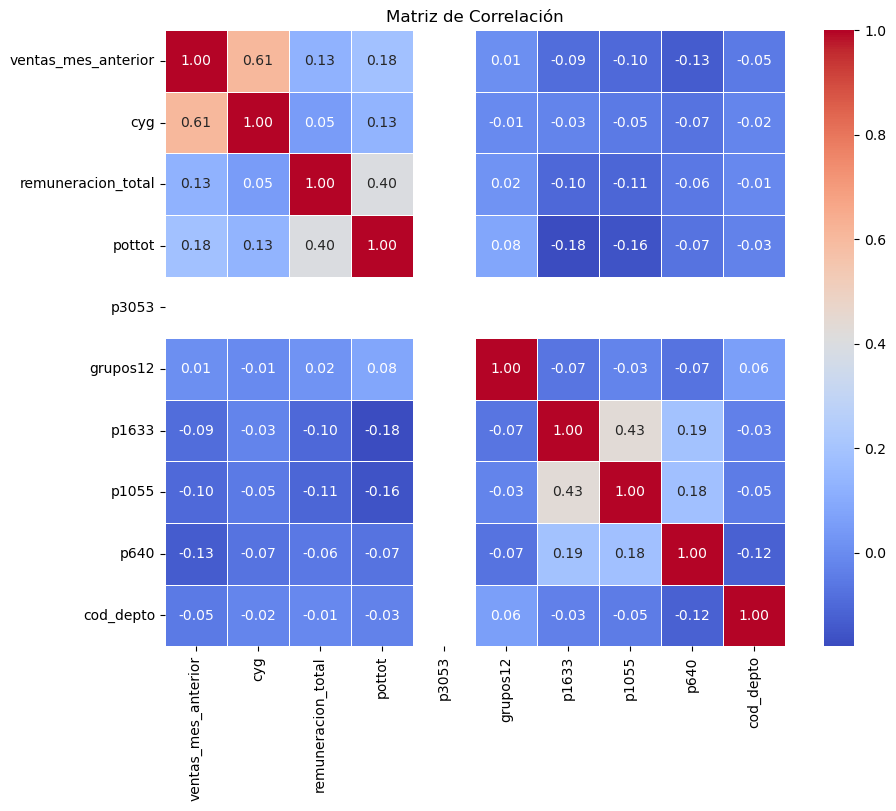

In [39]:
# Calcular la matriz de correlación, Se utiliza el método corr() del DataFrame para calcular la matriz de correlación entre
#todas las variables seleccionadas en variables_principales. La matriz de correlación muestra cómo están relacionadas 
#linealmente las diferentes variables entre sí.

correlation_matrix = variables_principales.corr()

# Mostrar o imprimir la matriz de correlación en la consola
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación utilizando un mapa de calor (heatmap) de seaborn
plt.figure(figsize=(10, 8)) #tamaño de la matriz
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5) # annot=True; muestra los valores de 
#correlación en cada celda, cmap='coolwarm' es la paleta de colores; fmt = '2f' formato de valores mostrado en cada celda, 
# para este caso, dos decimales, linewidth=5; ancho de las líneas.
plt.title('Matriz de Correlación')
plt.show()


Epoch 1/50


C:\Users\cegut\.conda\envs\anomalias\Lib\site-packages\keras\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


238/238 - 1s - 6ms/step - loss: 0.9997 - mae: 0.5552 - val_loss: 1.1210 - val_mae: 0.5608
Epoch 2/50
238/238 - 0s - 1ms/step - loss: 0.9999 - mae: 0.5598 - val_loss: 1.1205 - val_mae: 0.5574
Epoch 3/50
238/238 - 0s - 1ms/step - loss: 1.0005 - mae: 0.5578 - val_loss: 1.1203 - val_mae: 0.5560
Epoch 4/50
238/238 - 0s - 1ms/step - loss: 1.0026 - mae: 0.5586 - val_loss: 1.1203 - val_mae: 0.5559
Epoch 5/50
238/238 - 0s - 1ms/step - loss: 0.9995 - mae: 0.5580 - val_loss: 1.1204 - val_mae: 0.5570
Epoch 6/50
238/238 - 0s - 1ms/step - loss: 0.9998 - mae: 0.5603 - val_loss: 1.1199 - val_mae: 0.5525
Epoch 7/50
238/238 - 0s - 1ms/step - loss: 0.9998 - mae: 0.5554 - val_loss: 1.1202 - val_mae: 0.5552
Epoch 8/50
238/238 - 0s - 1ms/step - loss: 0.9993 - mae: 0.5589 - val_loss: 1.1201 - val_mae: 0.5546
Epoch 9/50
238/238 - 0s - 1ms/step - loss: 0.9999 - mae: 0.5565 - val_loss: 1.1201 - val_mae: 0.5547
Epoch 10/50
238/238 - 0s - 1ms/step - loss: 1.0019 - mae: 0.5590 - val_loss: 1.1200 - val_mae: 0.5536


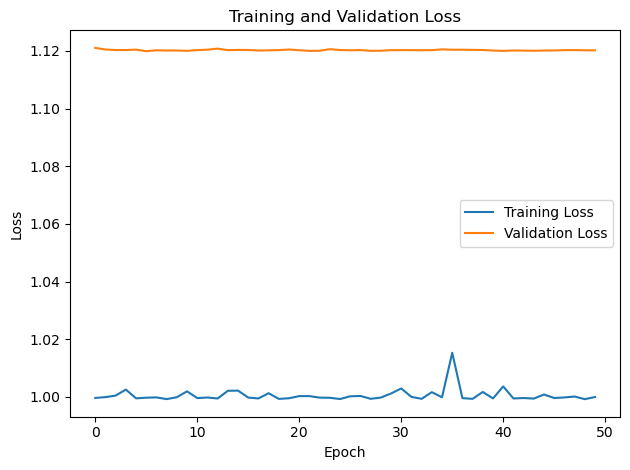

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Índices de datos anómalos: [  73  214  312  319  493  694  758  819  859  904  917  926 1004 1118
 1150 1197 1239 1249 1358 1367 1468 1474 1500 1630 1753 1796 1849 1865]


In [40]:
# Seleccionamos las variables predictoras (X) y la variable de salida (y)
X = variables_principales.drop(['ventas_mes_anterior'], axis=1)
y = variables_principales['ventas_mes_anterior']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Construimos el modelo de regresión
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Capa de salida lineal para regresión

# Compilamos el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled), verbose=2)

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f'Mean Absolute Error (MAE) en el conjunto de prueba: {mae}')

# Visualizamos la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Predicciones en el conjunto de prueba
predictions_scaled = model.predict(X_test_scaled)

# Desnormalizar las predicciones
predictions = scaler_y.inverse_transform(predictions_scaled)

residuals = y_test.values - predictions.flatten() # --> Calcular los residuos (diferencia entre las predicciones y los valores reales)

# Calcular la desviación estándar de los residuos
std_dev_residuals = np.std(residuals)

anomaly_threshold = 3 * std_dev_residuals # --> Definir un umbral para detectar aLnomalías (por ejemplo, 3 veces la desviación estándar)

anomalies = np.where(np.abs(residuals) > anomaly_threshold)[0] # -- > Identificamos los índices de los datos anómalos

print("Índices de datos anómalos:", anomalies) # --> Mostramos los índices de los datos anómalos


In [41]:
# regla de tukey 

# Obtener las predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Calcular los residuos
residuals = y_test_scaled - predictions.reshape(-1)

# Calcular el rango intercuartílico (IQR)
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = (residuals < lower_limit) | (residuals > upper_limit)

# Mostrar estadísticas sobre valores atípicos
print(f'Número de valores atípicos: {np.sum(outliers)}')
print(f'Porcentaje de valores atípicos: {np.mean(outliers) * 100}%')


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
Número de valores atípicos: 310026
Porcentaje de valores atípicos: 8.569926393270242%


In [42]:
# Obtener las filas con valores atípicos
outliers_rows = X_test[outliers]

# Mostrar las filas con valores atípicos
print("Filas con valores atípicos:")
outliers_rows

Filas con valores atípicos:


,cyg,remuneracion_total,pottot,p3053,grupos12,p1633,p1055,p640,cod_depto
directorio,,,,,,,,,
7077588,6398000,1440000,2.0,4,7,2,2,5,8
7077588,6398000,1440000,2.0,4,7,2,2,5,8
7077588,6398000,1440000,2.0,4,7,2,2,5,8
7077588,6398000,1440000,2.0,4,7,2,2,5,8
7077588,6398000,1440000,2.0,4,7,2,2,5,8
...,...,...,...,...,...,...,...,...,...
5048323,380000,0,NaN,4,5,2,2,5,18
5048323,380000,0,NaN,4,5,2,2,5,18
5048323,380000,0,NaN,4,5,2,2,5,18


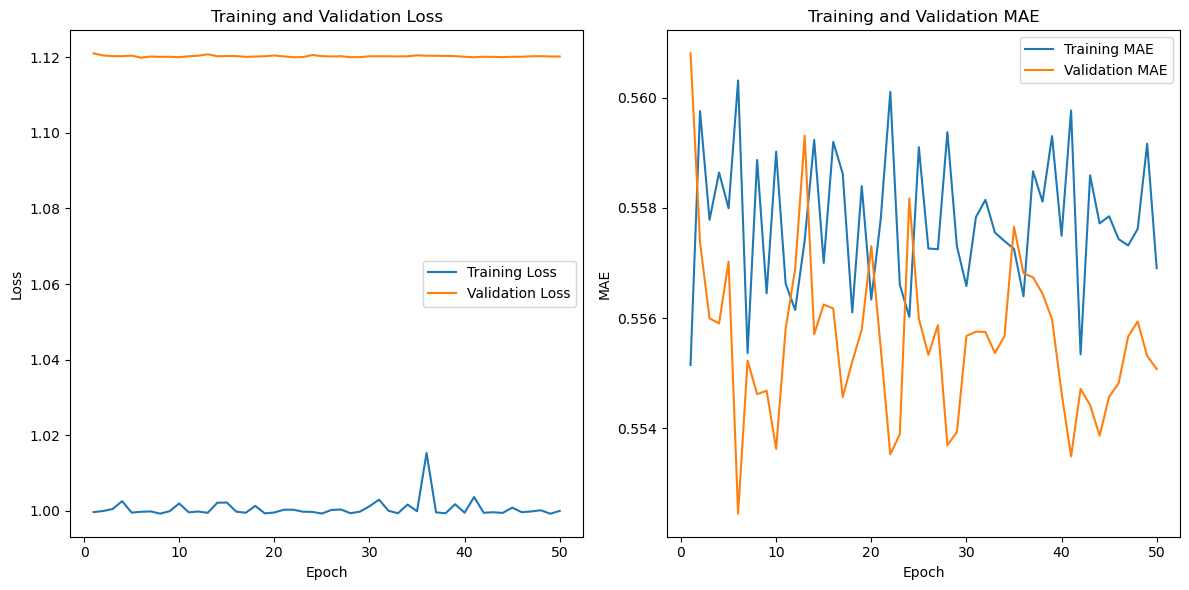

In [43]:
import matplotlib.pyplot as plt

# Visualizamos la pérdida y el MAE durante el entrenamiento
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 6)) # --> Pérdida en el conjunto de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2) # --> MAE en el conjunto de entrenamiento y validación
plt.plot(epochs, history.history['mae'], label='Training MAE')
plt.plot(epochs, history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


- la pérdida en el conjunto de prueba ('va_loss') tiene un comportamiento hacia la baja o que disminuye en la gran mayoria de epocas o EPOCHS, lo cual es positivo.
- El MAE es el conjunto de prueba ('val_mae') también disminuye, lo cual nos indica que las predicciones del modelo estan mejorando en terminos de la precisión.

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


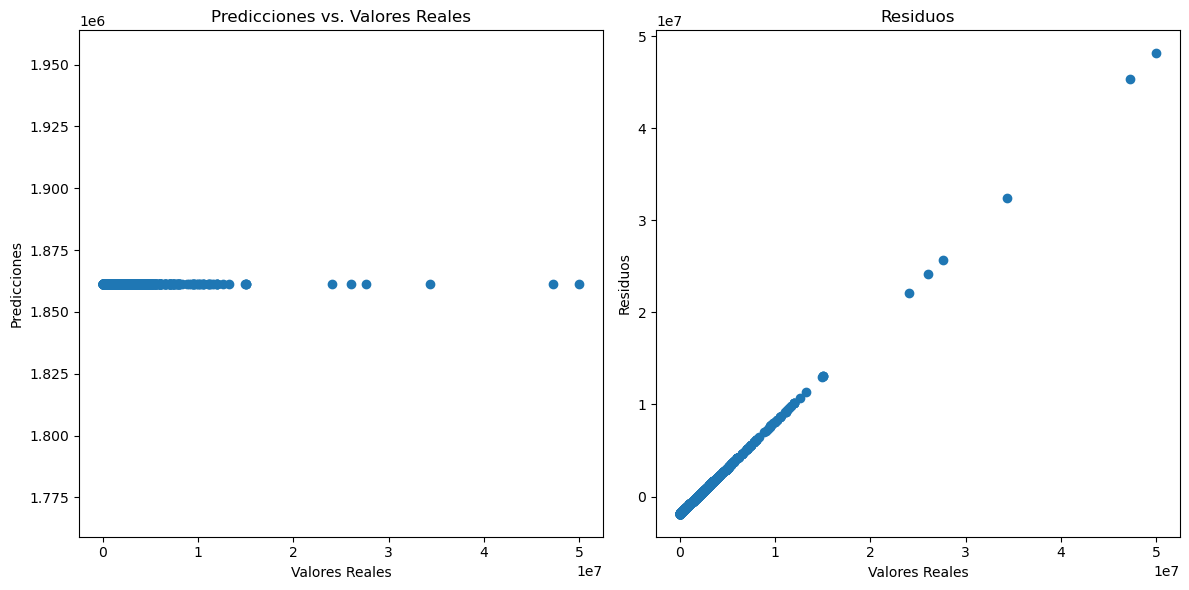

In [44]:
# Obtener predicciones en el conjunto de prueba
y_pred_scaled = model.predict(X_test_scaled)

# Deshacemos la normalización en las predicciones y en los datos reales
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled)

# Calculamos los  residuos
residuos = y_test_unscaled.flatten() - y_pred.flatten()

# Visualizamos las predicciones vs. valores reales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_unscaled, y_pred)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Visualizamos los residuos
plt.subplot(1, 2, 2)
plt.scatter(y_test_unscaled, residuos)
plt.title('Residuos')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()

In [45]:
# Establecer un umbral para identificar anomalías (por ejemplo, 3 desviaciones estándar)
umbral_anomalia = 3

anomalias_indices = np.where(np.abs(residuos) > umbral_anomalia)[0] # --> Identificar filas con residuos significativos

anomalias = data.loc[y_test.index[anomalias_indices]] # --> Mostrar las filas con anomalías

print("Filas con anomalías:")
anomalias.shape

Filas con anomalías:


(2269, 195)

In [46]:
# Calcular el rango intercuartílico (IQR) de los residuos
Q1 = np.percentile(residuos, 25)
Q3 = np.percentile(residuos, 75)
IQR = Q3 - Q1

# Establecer el factor multiplicativo (puedes ajustar este valor según sea necesario)
factor_tukey = 1.5

# Calcular los límites para identificar anomalías
limite_inferior = Q1 - factor_tukey * IQR
limite_superior = Q3 + factor_tukey * IQR

anomalias_indices_tukey = np.where((residuos < limite_inferior) | (residuos > limite_superior))[0] # --> Identificar filas con residuos fuera de los límites

anomalias_tukey = data.loc[y_test.index[anomalias_indices_tukey]] # --> Mostrar las filas con anomalías según la regla de Tukey

print("Filas con anomalías según la regla de Tukey:")
anomalias_tukey.shape

Filas con anomalías según la regla de Tukey:


(191, 195)

In [47]:
anomalias_tukey.head()

,secuencia_p,secuencia_encuesta,cod_depto,area,clase_te,p35,p241,mes_ref,p3031,p3032_1,...,p1573_2,p1573_3,p1573_4,p1573_5,p1573_6,p1574,p1771,ola,cyg,pottot
directorio,,,,,,,,,,,,,,,,,,,,,
7077588,1,5,8,NaN,1,2,28,JUNIO,1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2022,6398000,2.0
7231311,1,1,73,73.0,1,1,62,NOVIEMBRE,2,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,6.0,2022,6700000,NaN
7019193,1,1,54,54.0,1,1,29,ABRIL,2,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2022,4024000,NaN
7027895,1,1,88,88.0,1,1,38,ABRIL,1,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2022,2045000,1.0
2142431,1,1,68,68.0,1,1,34,ENERO,2,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2022,4515000,NaN


In [48]:
# Exportando la tabla de anómalos a partir de los resultados obtenidos con el criterio de Tukey
anomalias_tukey.to_excel('datos/RN_tabla_anomalos.xlsx', index = True)